In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/5p/j2sf71mn1csfx38_374kdnz80000gn/T/ipykernel_14463/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
class NeuralNetwork:
    def __init__(self, N, K=2):
        self.N = N
        self.K = K

        # Weights initialized as independent random vectors with norm 1. This can be found through x=v/||v||
        W = np.zeros(shape=(N, K))
        for k in range(K):
            w_k = np.random.rand(N)
            W[:,k] = w_k / np.sqrt(np.dot(w_k, w_k))

        self.w = W

        # v_k = weights for K neurons to output, these weights are fixed (=1)
        if (K==2):
            self.v_k = np.ones(shape=(K,1))
        else:
            self.v_k = np.full(shape=(K,1), fill_value=1/K)

    def forward(self, input):
        sigma = 0

        for k in range(self.K):
            wk = self.w[:, k]
            # sigma = sum of (v_k * tanh (w_k \cdot \xi))
            sigma += self.v_k[k] * np.tanh(np.dot(wk, input))

        return sigma

    def stochGradientDescent(self, X, y, lr):

        output = self.forward(X)
        # gradient is the derivative of the loss function
        # gradient of linear identity layer v_k (hidden -> output) is just 1
        difference = output - y
        for k in range(self.K):
            w_k = self.w[:,k]
            # gradient = (sigma - tau)*(1 - (\tanh(w_k \npdot \xi))^2) * \xi
            gradient = float(difference * self.v_k[k] * (1 - np.square(np.tanh(np.dot(w_k, X))))) * X
            w_k -= lr * gradient
            self.w[:,k] = w_k


def costFunction(dataset, NN, P, Q):

        E_train = 0
        # iterate through samples
        for i in range(P):
            xi_i = dataset[0][i]
            tau_i = dataset[1][i]
            # foward call
            output = NN.forward(xi_i)

            # calc and add to cost
            E_train += (pow((output - tau_i), 2) / 2)

        # devide cost by nr samples to get final cost
        E_train /= P

        # calculate for test set
        E_test = 0
        # iterate through samples
        for i in range(Q):
            xi_i = dataset[0][i + P]
            tau_i = dataset[1][i + P]
            # foward call
            output = NN.forward(xi_i)

            # calc and add to cost
            E_test += (pow((output - tau_i), 2) / 2)

        # devide cost by nr samples to get final cost
        E_test /= Q


        return E_train, E_test

def train(NN):
        # store costs each epoch
        E_train = []
        E_test = []

        for t in range(t_max):
            # random vector between 0 and P
            current_example = np.random.randint(0,P, size=P)

            for i in current_example:
                xi_i = dataset[0][i]
                tau_i = dataset[1][i]
                # Do gradient descent
                NN.stochGradientDescent(xi_i, tau_i, lr)
            # Calculate cost
            E_training, E_testing = costFunction(dataset, NN, P, Q)

            E_train.append(E_training)
            E_test.append(E_testing)

        return E_train, E_test, NN.w

## Constants declared here
# data: sample = xi, labels = tau
xi = pd.read_csv("data/xi.csv", delimiter=',', header=None)
tau = pd.read_csv("data/tau.csv", delimiter=',', header=None)
dataset = (xi, tau)

# input size (sample dimension)
N = len(dataset[0][0])
# nr of samples in data
p = len(tau)
# learning rate
lr = 0.05
# nr of training epochs
epochs = 1
P = 100
Q = 100
t_max = 80

# Initialize neural network(s)
NN_all = NeuralNetwork(N)
# NN_subset = NeuralNetwork(N)

E_train, E_test, w = train(NN_all)

/var/folders/5p/j2sf71mn1csfx38_374kdnz80000gn/T/ipykernel_14463/4105401636.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gradient = float(difference * self.v_k[k] * (1 - np.square(np.tanh(np.dot(w_k, X))))) * X


Epoch: 0, Error: 0    0.2594
Name: 0, dtype: float64, Test Error: 0    0.3172
Name: 100, dtype: float64
Epoch: 1, Error: 0    0.126514
Name: 0, dtype: float64, Test Error: 0    0.194322
Name: 100, dtype: float64
Epoch: 2, Error: 0    0.077504
Name: 0, dtype: float64, Test Error: 0    0.11929
Name: 100, dtype: float64
Epoch: 3, Error: 0    0.058418
Name: 0, dtype: float64, Test Error: 0    0.123821
Name: 100, dtype: float64
Epoch: 4, Error: 0    0.039193
Name: 0, dtype: float64, Test Error: 0    0.152603
Name: 100, dtype: float64
Epoch: 5, Error: 0    0.043218
Name: 0, dtype: float64, Test Error: 0    0.16881
Name: 100, dtype: float64
Epoch: 6, Error: 0    0.041378
Name: 0, dtype: float64, Test Error: 0    0.146783
Name: 100, dtype: float64
Epoch: 7, Error: 0    0.038859
Name: 0, dtype: float64, Test Error: 0    0.153956
Name: 100, dtype: float64
Epoch: 8, Error: 0    0.022476
Name: 0, dtype: float64, Test Error: 0    0.161187
Name: 100, dtype: float64
Epoch: 9, Error: 0    0.022963
Nam

KeyboardInterrupt: 

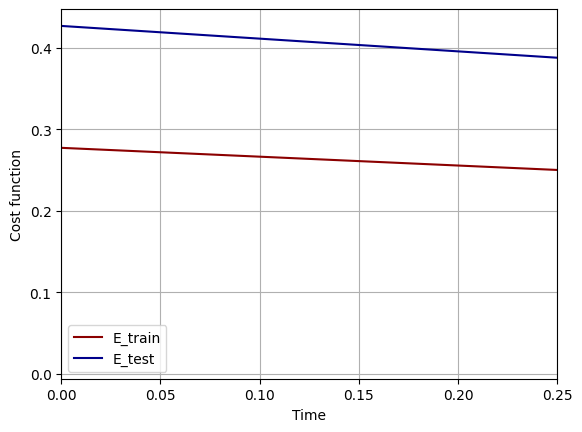

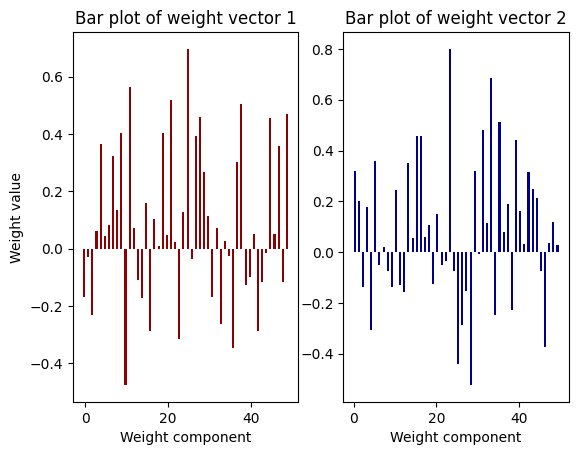

In [58]:
def plot_costs(E_train, E_test, ylim = None, xlim = None):

    plt.plot(range(len(E_train)), E_train, label='E_train', color='darkred')
    plt.plot(range(len(E_test)), E_test, label='E_test', color='darkblue')
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.xlabel('Time')
    plt.ylabel('Cost function')
    plt.grid()
    plt.legend()
    plt.show()

def plot_weights(w, bin_width=0.5):

    W = np.array(range(len(w[:, 0])))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.bar(W - bin_width / 2, w[:,0], width=bin_width, color='darkred', label='w1')
    ax1.set_title("Bar plot of weight vector 1")
    ax1.set_xlabel("Weight component")
    ax1.set_ylabel("Weight value")
    ax2.bar(W + bin_width / 2, w[:,1], width=bin_width, color='darkblue', label='w2')
    ax2.set_title("Bar plot of weight vector 2")
    ax2.set_xlabel("Weight component")
    # ax2.set_ylabel("Weight value")

    plt.show()

plot_costs(E_train, E_test, xlim = [0, 0.25])
plot_weights(w)

# Body fat dataset

In [59]:
# K=3
def plot_weights(w, bin_width=0.5):

    W = np.array(range(len(w[:, 0])))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.bar(W - bin_width / 2, w[:,0], width=bin_width, color='darkred', label='w1')
    ax1.set_title("Weight vector 1")
    ax1.set_xlabel("Weight component")
    ax1.set_ylabel("Weight value")
    ax2.bar(W + bin_width / 2, w[:,1], width=bin_width, color='darkblue', label='w2')
    ax2.set_title("Weight vector 2")
    ax2.set_xlabel("Weight component")
    ax3.bar(W + bin_width / 2, w[:,2], width=bin_width, color='green', label='w3')
    ax3.set_title("Weight vector 3")
    ax3.set_xlabel("Weight component")
    # ax2.set_ylabel("Weight value")

    plt.show()

In [60]:
xi = pd.read_csv("xzscore.csv", delimiter=',', header=None)
tau = pd.read_csv("tshift.csv", delimiter=',', header=None)
dataset = (xi, tau)

# input size (sample dimension)
N = len(dataset[0][0])

P = 200
Q = 52
t_max = 150

# Initialize neural network(s)
NN_all = NeuralNetwork(N, 5)
# NN_subset = NeuralNetwork(N)

E_train, E_test, w = train(NN_all)

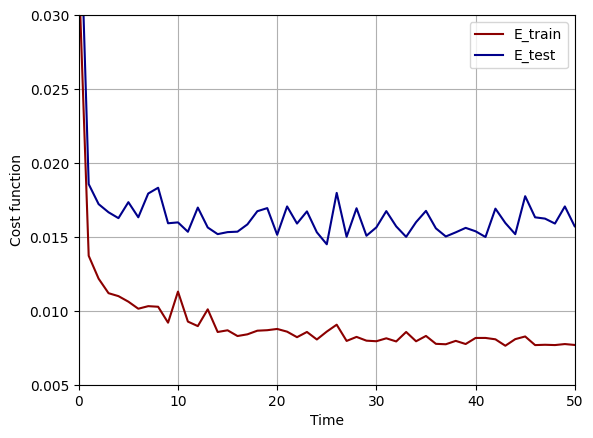

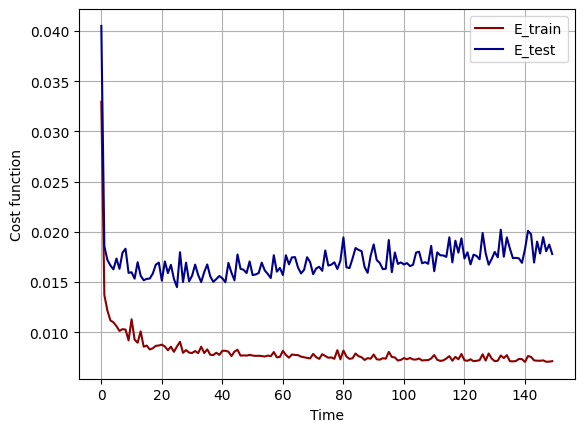

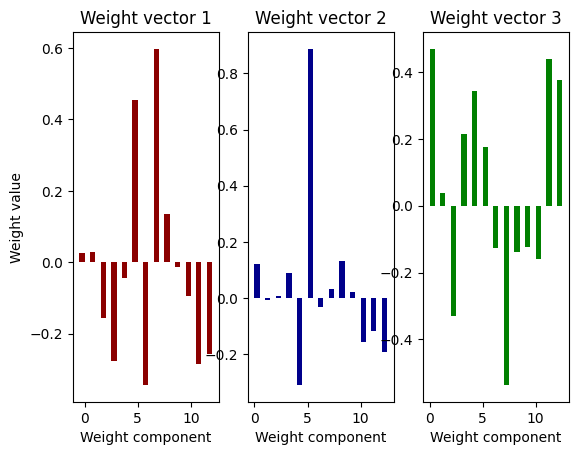

In [61]:
plot_costs(E_train, E_test, [0.005, 0.03], [0, 50])
plot_costs(E_train, E_test)
# plot_costs(E_train, E_test, [0.005, 0.03])
plot_weights(w)